<a href="https://colab.research.google.com/github/beruscoder/architectures/blob/main/alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/tongpython/cat-and-dog")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: janstylewsi7
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog


100%|██████████| 218M/218M [00:00<00:00, 818MB/s] 


In [2]:
!pip3 install tensorflow numpy as matplotlib keras

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import image_dataset_from_directory
from keras.utils import plot_model

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, auc


In [4]:
#paths
cat_path = '/content/cat-and-dog/training_set/training_set/cats'
dog_path = '/content/cat-and-dog/training_set/training_set/dogs'

In [23]:
#set path
data_dir = "/content/cat-and-dog/training_set/training_set"

#hyperparameter
img_width, img_height = 224,224
batch_size = 32
epochs = 5
validation_split = 0.2

array([[[ 40,  44,  39],
        [ 40,  44,  39],
        [ 43,  44,  40],
        ...,
        [173, 204, 207],
        [166, 199, 202],
        [163, 198, 201]],

       [[ 41,  45,  40],
        [ 41,  45,  40],
        [ 43,  44,  40],
        ...,
        [169, 200, 203],
        [163, 196, 199],
        [159, 194, 197]],

       [[ 41,  45,  40],
        [ 41,  45,  40],
        [ 43,  44,  40],
        ...,
        [166, 195, 199],
        [164, 194, 199],
        [162, 194, 199]],

       ...,

       [[ 31,  30,  32],
        [ 29,  28,  30],
        [ 25,  24,  26],
        ...,
        [ 17,  23,  36],
        [ 24,  30,  41],
        [ 40,  46,  57]],

       [[ 31,  30,  32],
        [ 29,  28,  30],
        [ 25,  24,  26],
        ...,
        [ 21,  29,  42],
        [ 25,  34,  44],
        [ 36,  45,  55]],

       [[ 31,  30,  32],
        [ 28,  27,  29],
        [ 24,  23,  25],
        ...,
        [ 30,  38,  51],
        [ 23,  32,  42],
        [ 21,  30,  40]]], dtype=uint8)
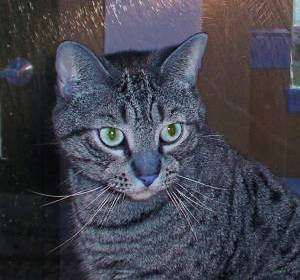

In [22]:
import cv2
image = cv2.imread('/content/cat-and-dog/training_set/training_set/cats/cat.1.jpg')
image

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = validation_split,
    subset = "training",
    seed = 123,
    image_size = (img_width, img_height),
    batch_size = batch_size
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


In [7]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = validation_split,
    subset = "validation",
    seed = 123,
    image_size = (img_width, img_height),
    batch_size = batch_size
)

Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [8]:
#augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
                                        ])

In [9]:
#data augmentation on training data set
train_dataset =train_dataset.map(lambda x, y: (data_augmentation(x, training =True),y))

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [28]:
#alexnet model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

alexnet_model = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(96,(11,11), strides=(4,4), activation = 'relu'),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(256,(5,5), padding='same',activation='relu'),
    MaxPooling2D((2,2),strides=(2,2)),
    Conv2D(384,(3,3), padding='same',activation='relu'),
    Conv2D(384,(3,3), padding='same',activation='relu'),
    Conv2D(384,(3,3), padding='same',activation='relu'),
    MaxPooling2D((3,3),strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [ ]:
alexnet_model.summary()

In [29]:
#compile
alexnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [32]:
#model training
history = alexnet_model.fit(train_dataset,
                            validation_data = validation_dataset,
                            epochs=5)

Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 90s 446ms/step - accuracy: 0.4978 - loss: 0.6936 - val_accuracy: 0.4878 - val_loss: 0.6935
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 98s 488ms/step - accuracy: 0.4989 - loss: 0.6935 - val_accuracy: 0.4872 - val_loss: 0.6955
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 136s 458ms/step - accuracy: 0.5080 - loss: 0.7094 - val_accuracy: 0.4878 - val_loss: 0.6941
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 143s 460ms/step - accuracy: 0.4941 - loss: 0.6939 - val_accuracy: 0.4878 - val_loss: 0.6946
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 136s 432ms/step - accuracy: 0.4850 - loss: 0.6945 - val_accuracy: 0.4878 - val_loss: 0.6936


In [33]:
val_loss, val_accuracy = alexnet_model.evaluate(validation_dataset)
print(f'validation Accuracy: {val_accuracy * 100:.2f}%')

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4866 - loss: 0.6937
validation Accuracy: 48.78%


In [34]:
alexnet_model.save("alexnetarchitecture.keras")

In [35]:
# to load model
from tensorflow.keras.models import load_model

loaded_model = load_model('alexnetarchitecture.keras')

In [36]:
loaded_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 13824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4096)           │    56,627,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,806,917 (888.09 MB)

 Trainable params: 77,602,305 (296.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 155,204,612 (592.06 MB)